## RQ1: The popularity of Pokemon

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from datetime import datetime, timedelta, date
import datetime
import time
import seaborn
plt.style.use('ggplot')
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()

# Loading data + preprocessing

Trends come from Google Trends

In [5]:
df_trends = pd.read_csv('pokemon_trends.csv')
df_trends_go = pd.read_csv('pokemonGo_trends.csv')
# Rename columns
df_trends.rename({df_trends.columns[1]:'keyword'},axis=1,inplace=True)
df_trends_go.rename({df_trends_go.columns[1]:'keyword'},axis=1,inplace=True)
# Replace non integers
df_trends_go.loc[df_trends_go['keyword']=='<1','keyword'] = 0.5

Change the month data from a string to a datetime so that matplotlib understands the jumps between dates

In [6]:
df_trends_go['Month'] = pd.to_datetime(df_trends_go['Month']).dt.to_period('M')
df_trends['Month'] = pd.to_datetime(df_trends['Month']).dt.to_period('M')

Keyword column contains the values of the relative search popularity. They are represented as a string, which is why we transform as string

In [7]:
df_trends_go['keyword'] = df_trends_go['keyword'].astype(int)

In [8]:
df_vgsales = pd.read_csv('vgsales.csv')

Add binary variable for games containing the word Pokemon

In [9]:
df_vgsales['pokemon_game'] = df_vgsales['Name'].str.contains('(?i)pokemon')

In [10]:
nintendo_sales = pd.read_excel('consolidated_sales_e2003.xlsx',index_col=[0,1,2],sheet_name="Nintendo DS and after")

In [11]:
nintendo_revenue = pd.read_excel('nintendo_revenue.xlsx')
monthly_price_nintendo = pd.read_csv('monthly_price_nintendo.csv')[['Date','Adj Close']]

Only keep the date from after 2003, since we don't have the data for google searches before 2004.

In [12]:
monthly_price_nintendo = monthly_price_nintendo[monthly_price_nintendo['Date']> '2003/1/1']

In [13]:
# Remove day
monthly_price_nintendo['Date'] = pd.to_datetime(monthly_price_nintendo['Date']).dt.to_period('M')

Change month columns to datetimes

In [14]:
df_trends.set_index('Month',inplace=True)
df_trends.index = df_trends.index.to_timestamp()
df_trends_go.set_index('Month',inplace=True)
df_trends_go.index = df_trends_go.index.to_timestamp()
monthly_price_nintendo.set_index('Date',inplace=True)
monthly_price_nintendo.index = monthly_price_nintendo.index.to_timestamp()

In [15]:
df_trends

,keyword
Month,
2004-01-01,12
2004-02-01,12
2004-03-01,12
2004-04-01,13
2004-05-01,15
...,...
2020-11-01,38
2020-12-01,39
2021-01-01,36


In [16]:
df_vgsales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
# List of consoles with year of release
console_releases={'N64':1996,'GC':2001, 'Wii':2006, 'NES_classic':2016, 'Nin_switch':2017, 
                  'GB_pocket':1996, 'GB_light':2017, 'GBColor':1998, 'GBA':2001, 'GBA_SP':2003,
                  'NDS':2004, 'GBMicro':2005, 'DS_lite':2006, 'NDSiXL':2009, 'N3DS':2011, 
                  'NDSXL':2012, 'N2DS': 2013, 'New_N3DS':2014, 'NSwitch':2017, 'New_N2DS_XL':2017,
                  'NSwitch_lite':2019}

<h3>Graph popularity of searches</h3>
<br>The goal of those two line graphs is to show how the popularity of the pokemon brand has evolved from 2004 (start of Gogle Trend). In the graph on the left, we can see that the popularity of Pokemon has reached it's peak in 2016, with the release of Pokemon Go. This being said, from 2017, since the popularity of Pokemon Go went down, we can see that the brand has seen a seen a steady increase.
<br><br> Looking at the graph on the right, we can atribute part of the increase of the Pokemon brand to Pokemon Go, however, it looks like the franchise as a whole is getting more popular since 2017-18

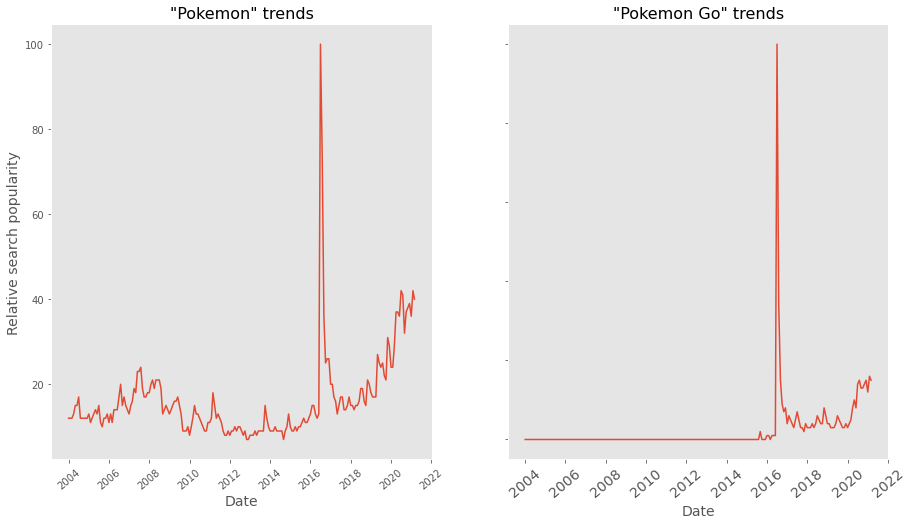

In [20]:
fig = plt.figure(figsize=(15,8))
ax1= fig.add_subplot(1, 2, 1)
ax2= fig.add_subplot(1, 2, 2)
plt.setp(ax2.get_yticklabels(), visible=False)

ax1.plot(df_trends.index,df_trends['keyword'])
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Relative search popularity', fontsize=14)
ax1.tick_params(axis='x', rotation=40)
ax1.set_title('"Pokemon" trends', fontsize=16)

ax2.plot(df_trends_go.index,df_trends_go['keyword'])
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='x', rotation=40)
ax2.set_title('"Pokemon Go" trends', fontsize=16)

ax2.tick_params(axis='x', which='major', labelsize=14)
ax1.grid(b=None)
ax2.grid(b=None)


plt.show()

<h3>Graph of search trend vs stock price</h3>
<br>This graph shows the popularity of the Pokemon brand versus the stock price of Nintendo. In the first half of the graph (2004-2014), we can see that the popularity of the brand doesn't correlate with the Google Trends data. There a many possible reasons for this non-correlation: 
<br> 1. During the financial crisis of 2008-9, stock prices went up a lot, while fundamentals didn't follow. This doesn't mean that the stock was necessarily overvalued.
<br> 2. The Google Trends data only incorporates data from Pokemon, however, Nintendo's portfolio includes many games other than Pokemon, which means it is possible that some of their other franchises (Mario for example) did well, while others didn't.

<br>From 2014 to 2021, we can see that there seems to be a higher correlation between the price and the search popularity

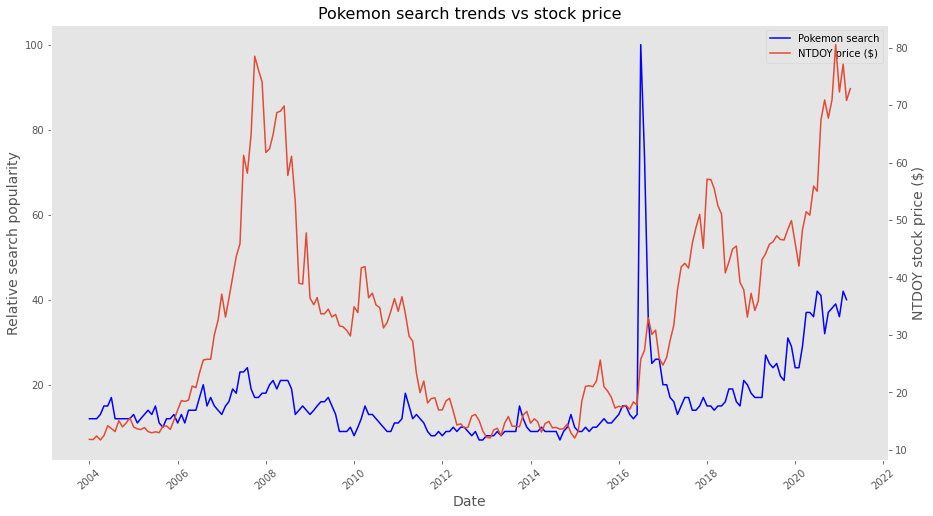

In [26]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)

l1 = ax.plot(df_trends.index,df_trends['keyword'], label='Pokemon search',color='blue')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Relative search popularity', fontsize=14)
ax.tick_params(axis='x', rotation=40)

ax2 = ax.twinx()
l2 = ax2.plot(monthly_price_nintendo.index,monthly_price_nintendo['Adj Close'], label='NTDOY price ($)')
ax2.set_ylabel('NTDOY stock price ($)', fontsize=14)


ax.set_title('Pokemon search trends vs stock price', fontsize=16)
lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
ax.grid(b=None)
ax2.grid(b=None)


plt.show()

<h3>Graph of stock price with console releases </h3>
<br>We dirst need to filter to keep consoles released after 2004.

In [27]:
df_consoles = pd.DataFrame([console_releases.keys(),console_releases.values()]).T

In [28]:
df_consoles.columns = ['Console','Year']
df_consoles = df_consoles[df_consoles['Year']>=2004]

In [29]:
df_consoles['Year2'] = pd.to_datetime(df_consoles['Year'],format='%Y')
df_consoles.set_index('Year2',inplace=True)

The next plot shows the stock price of Nintendo, to see if the release of popular consoles is correlated with price increases.
<br>If there is more than 1 console release for a certain year, the console data is represented one over each other. The black dot represents the start of the year of release. 
<br>I wasn't able to find more precise information as to when the console was released during the year.

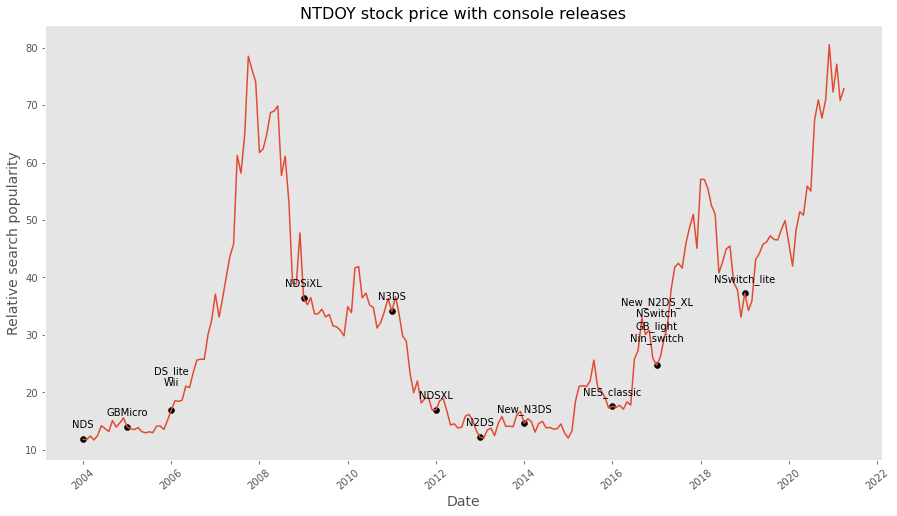

In [30]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)

ax.plot(monthly_price_nintendo.index,monthly_price_nintendo['Adj Close'])
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Relative search popularity', fontsize=14)
ax.tick_params(axis='x', rotation=40)

all_yr_prices = []
yrs = []

ax.set_title('NTDOY stock price with console releases', fontsize=16)
for yr in df_consoles.Year.unique():
    df_filt = df_consoles[df_consoles['Year']==yr]
    nb_year_vals = len(df_filt.index)
    df_filt_yr = df_filt.index[0]
    all_yr_prices.append(monthly_price_nintendo.loc[df_filt_yr]['Adj Close'])
    yrs.append(df_filt.index[0])
    
    # One console for given year
    if nb_year_vals == 1: 
        ax.text(df_filt_yr, monthly_price_nintendo.loc[df_filt_yr]['Adj Close']+2,
                df_filt.loc[df_filt_yr, 'Console'], ha='center') #, rotation = 90
    else:
        st_id = 1
        for idx, row in df_filt.iterrows():
            ax.text(df_filt_yr, monthly_price_nintendo.loc[df_filt_yr]['Adj Close']+((1+st_id)*2.1),
                row['Console'], ha='center') #, rotation = 90
            st_id += 1
       

    
ax.scatter(yrs,all_yr_prices, color='black')
ax.grid(b=None)

plt.show()

<h3>Nintendo Revenues vs Stock Price</h3>
<br>In this graph, we see that there is a high correlation between Nintendo sales and their revenues. 
<br>The point to make is that there are spikes for the revenue data (which are published quarterly from 2006-2016). It is possible that new console releases are happening prior to the spikes, with the other 3 quarters accounting for a lot less sales. 

<br>After 2016, the granularity of the data changes. I wasn't able to find out why the data is less granular. Multiple sources provide the same data for revenues.

In [31]:
nintendo_revenue['Month'] = pd.to_datetime(nintendo_revenue['Month']).dt.to_period('M')
nintendo_revenue.set_index('Month',inplace=True)
nintendo_revenue.index = nintendo_revenue.index.to_timestamp()

We can see that in the first years, the data is quarterly, while in the last 5-6 years, the data is yearly.

In [32]:
print(nintendo_revenue.head(8))
print(nintendo_revenue.tail(8))

            Revenue (million)
Month                        
2020-06-01               3330
2019-06-01               1566
2018-06-01               1547
2017-06-01               1387
2016-06-01                576
2015-06-01                740
2015-03-01                892
2014-12-01               2300
            Revenue (million)
Month                        
2006-12-01               3517
2006-09-01               1444
2006-06-01               1178
2006-03-01                990
2005-12-01               2006
2005-09-01                951
2005-06-01                636
2005-03-01                904


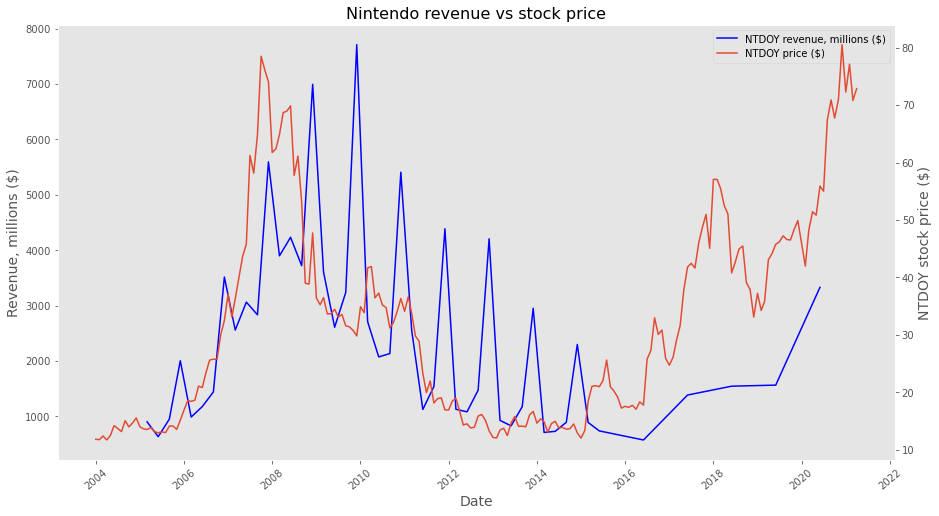

In [34]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)

l1 = ax.plot(nintendo_revenue, label='NTDOY revenue, millions ($)',color='blue')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Revenue, millions ($)', fontsize=14)
ax.tick_params(axis='x', rotation=40)

ax2 = ax.twinx()
l2 = ax2.plot(monthly_price_nintendo.index,monthly_price_nintendo['Adj Close'], label='NTDOY price ($)')
ax2.set_ylabel('NTDOY stock price ($)', fontsize=14)


ax.set_title('Nintendo revenue vs stock price', fontsize=16)
lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
ax.grid(b=None)
ax2.grid(b=None)


plt.show()

<h3>Game sales</h3>

In [35]:
df_vgsales_pokemon = df_vgsales.copy()[df_vgsales['pokemon_game']]
# df_vgsales_pokemon.loc[:,'Year'] = df_vgsales_pokemon.loc[:,'Year']
df_vgsales_pokemon.loc[:,'Year'] = pd.to_datetime(df_vgsales_pokemon.loc[:,'Year'].astype(int),format='%Y').dt.to_period('Y')
df_vgsales_pokemon.set_index('Year',inplace=True)
df_vgsales_pokemon.index = df_vgsales_pokemon.index.to_timestamp()

In [36]:
df_vgsales_pokemon.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pokemon_game
Year,,,,,,,,,,,
1996-01-01,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,True
1999-01-01,13,Pokemon Gold/Pokemon Silver,GB,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,True
2006-01-01,21,Pokemon Diamond/Pokemon Pearl,DS,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,True
2002-01-01,26,Pokemon Ruby/Pokemon Sapphire,GBA,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,True
2010-01-01,27,Pokemon Black/Pokemon White,DS,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,True


In this graph, we can see the most popular Pokemon games. The first argument __nb_games__ changes the number of bars to be shown. The y axis shows the number of copies sold, in million.

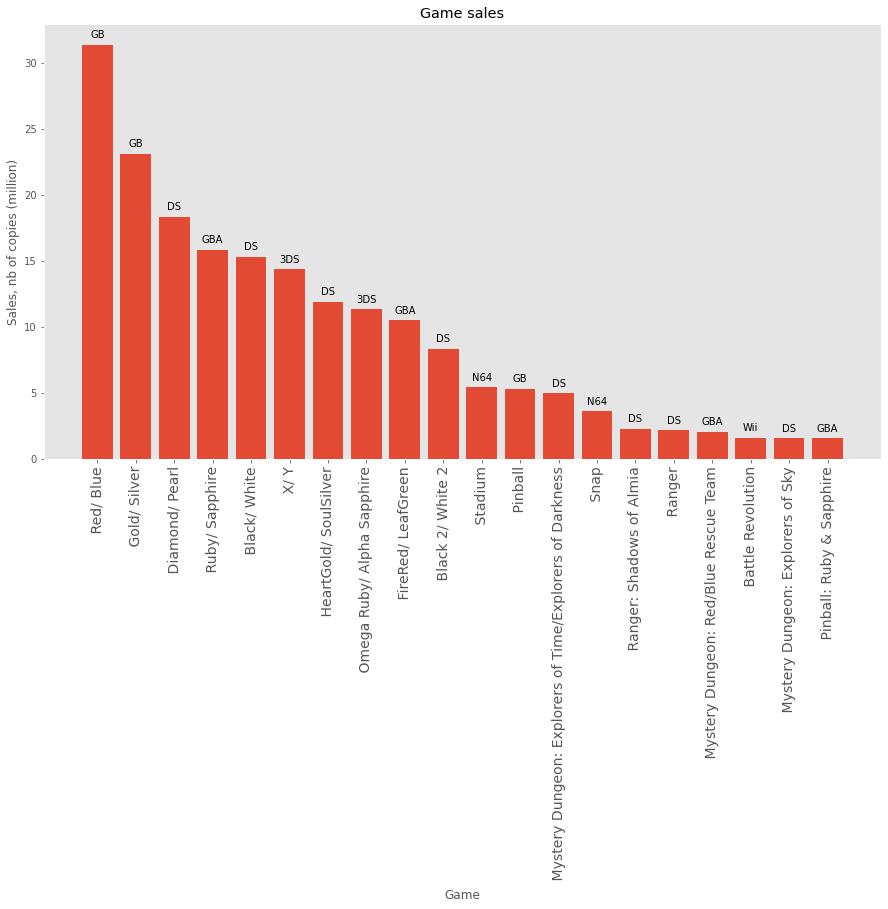

In [37]:
nb_games = 20

fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
df_vgsales_pokemon['stripped_name'] = df_vgsales_pokemon['Name'].apply(lambda x: str(x).replace('Pokemon',''))
plt.bar(df_vgsales_pokemon['stripped_name'][:nb_games],df_vgsales_pokemon['Global_Sales'][:nb_games])
plt.title('Game sales')
plt.xlabel('Game')
plt.ylabel('Sales, nb of copies (million)')
plt.xticks(fontsize=14,rotation=90)
bar_nb = 0 
for idx, row in df_vgsales_pokemon.iloc[:nb_games].iterrows():
    ax.text(bar_nb, row['Global_Sales']+0.5, row['Platform'],horizontalalignment='center' )
    bar_nb += 1
plt.grid(b=None)

plt.show()

The following shows the same information, but for every Nintendo games. We can see that the most popular Pokemon game (Red/Blue) is the 5th most popular game, with only 2 Pokemon games in the top 20 most popular games from Nintendo. It seems that most of Nintendo's game revenue doesn't come from Pokemon games. We will take a look at the exact percentage in the next section. 

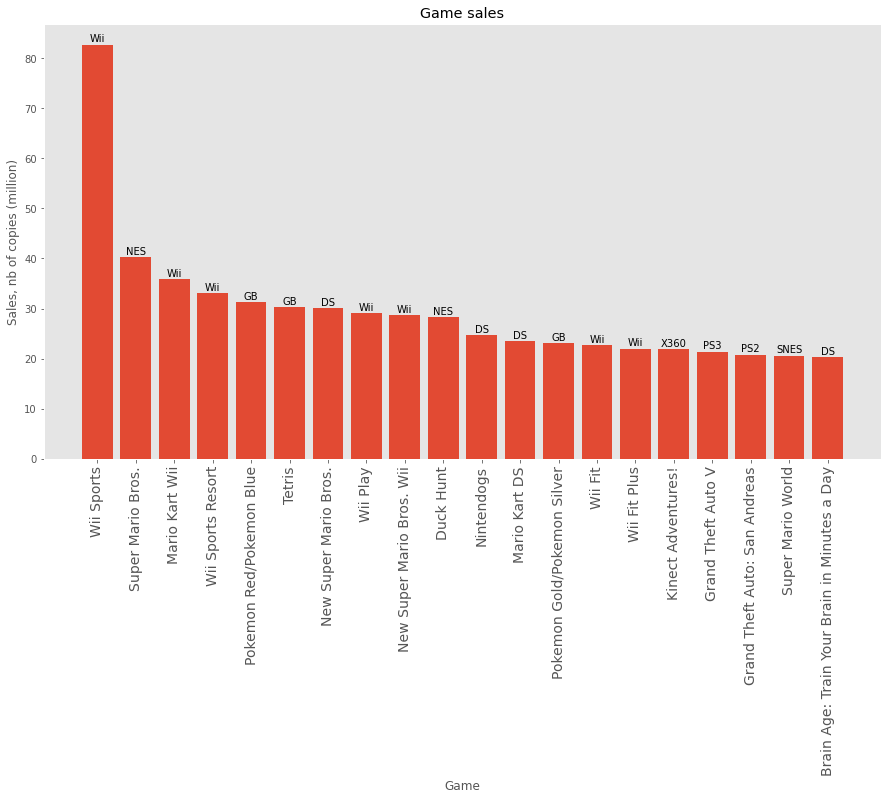

In [38]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
# df_vgsales_pokemon['stripped_name'] = df_vgsales_pokemon['Name'].apply(lambda x: str(x).replace('Pokemon',''))
plt.bar(df_vgsales['Name'][:nb_games],df_vgsales['Global_Sales'][:nb_games])
plt.title('Game sales')
plt.xlabel('Game')
plt.ylabel('Sales, nb of copies (million)')
plt.xticks(fontsize=14,rotation=90)
bar_nb = 0 
for idx, row in df_vgsales.iloc[:nb_games].iterrows():
    ax.text(bar_nb, row['Global_Sales']+0.5, row['Platform'],horizontalalignment='center' )
    bar_nb += 1
plt.grid(b=None)

plt.show()

In [39]:
print(f"Percentage of Nintendo's sales (in nb of compes) from Pokemon games {round(100*(df_vgsales_pokemon['Global_Sales'].sum()/df_vgsales['Global_Sales'].sum()),1)}%")

Percentage of Nintendo's sales (in nb of compes) from Pokemon games 2.3%


This confirms the hypothesis that Nintendo revenues are uncorrelated with Pokemon search terms

<h3>Console sales</h3>

In [40]:
nintendo_sales = nintendo_sales[:-1]
nintendo_sales.reset_index(inplace=True)
nintendo_sales.columns = ['Console','SW/HW','Region'] + list(nintendo_sales.columns[3:])
nintendo_sales_region = nintendo_sales.copy()
nintendo_sales_region = nintendo_sales_region[nintendo_sales_region['Region'] == 'Total']

In [41]:
agg_console_sale = nintendo_sales_region.groupby('Console').agg({'Life\nto date':sum}).sort_values('Life\nto date',ascending=False)

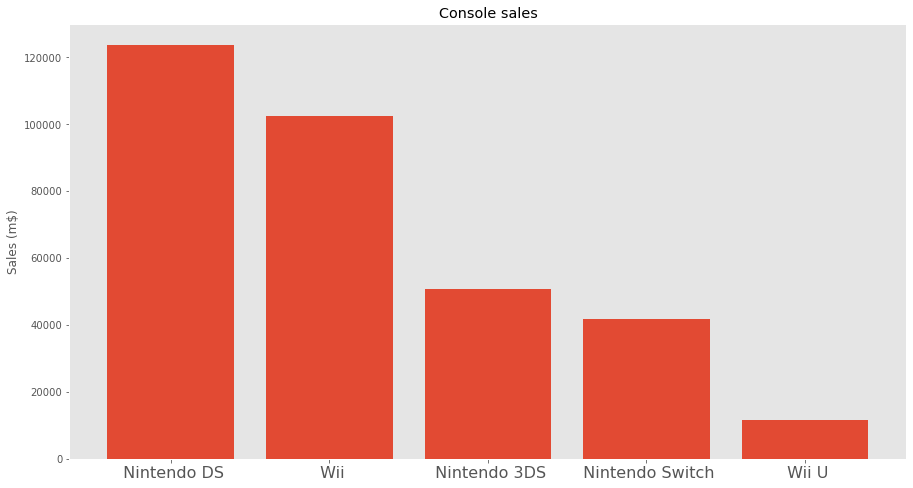

In [43]:
fig = plt.figure(figsize=(15,8))
ax= fig.add_subplot(111)
plt.bar(agg_console_sale.index, agg_console_sale['Life\nto date'])
plt.xticks(fontsize=16)
plt.ylabel('Sales (m$)')
plt.title('Console sales')
plt.grid(b=None)

plt.show()